# Labo 8
Opérations morphologiques binaires et en niveaux de gris

In [1]:
from skimage import data, morphology
import matplotlib.pyplot as plt
import numpy as np

## Exercice 1
Aller chercher les contours dans une image à l'aide d'une érosion

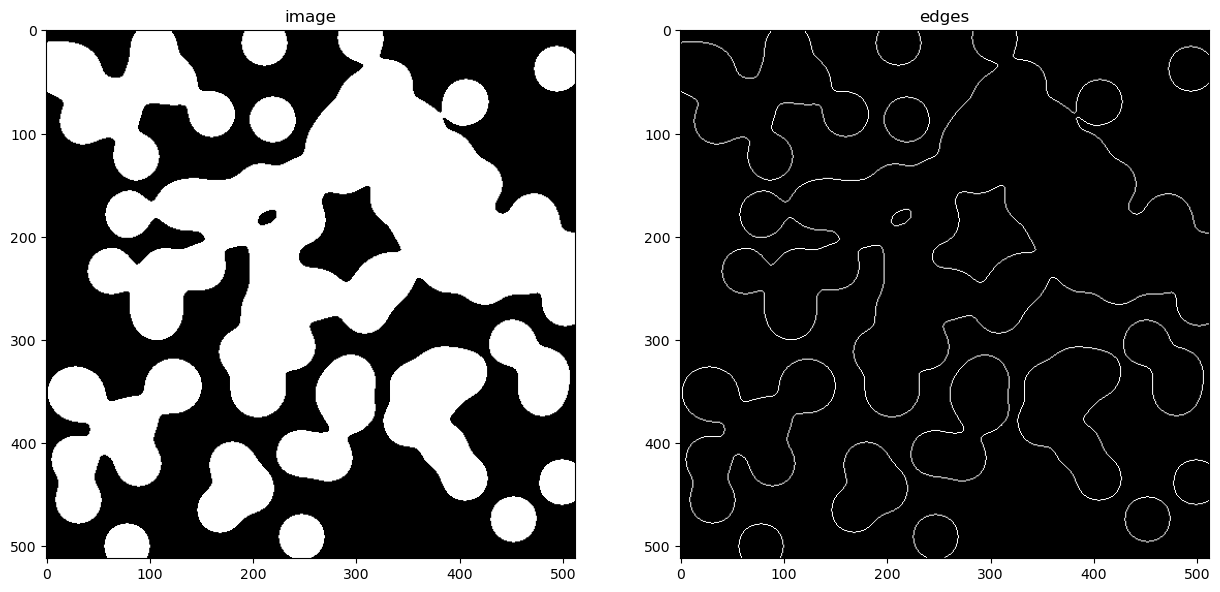

In [3]:
img = data.binary_blobs()

plt.figure(figsize=(15,15))

plt.subplot(121); plt.imshow(img, cmap='gray'); plt.title('image')

h = [[0, 1, 0],
     [1, 1, 1],
     [0, 1, 0]]
h = np.array(h)

ero = morphology.binary_erosion(img, h)

edge = np.logical_xor(img, ero)

plt.subplot(122); plt.imshow(edge, cmap='gray'); plt.title('edges')

plt.show()

## Exercice 2
Faire une dilatation géodésique avec un masque de sorte à reconstruire des blobs à partir d'un point (seed)

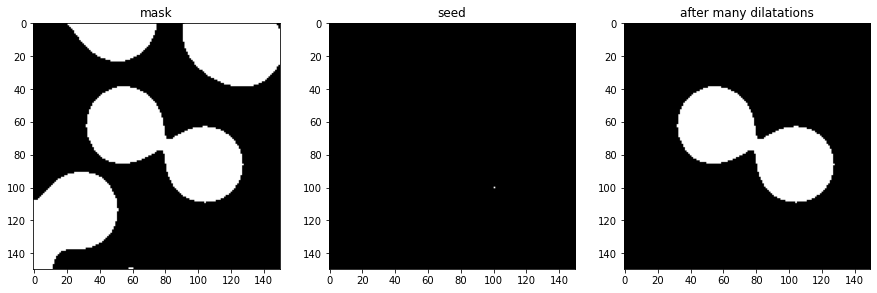

In [20]:
mask = img[150:300, 100:250]
seed = np.zeros_like(mask)
seed[100, 100] = 1
h = [[0, 1, 0],
     [1, 1, 1],
     [0, 1, 0]]

plt.figure(figsize=(15,15))

plt.subplot(131); plt.imshow(mask, cmap='gray'); plt.title('mask')
plt.subplot(132); plt.imshow(seed, cmap='gray'); plt.title('seed')

prev = None
curr = seed.copy()
while np.not_equal(prev, curr).any():
    prev = curr.copy()
    curr = np.logical_and(mask, morphology.binary_dilation(curr, h))
    
plt.subplot(133); plt.imshow(curr, cmap='gray'); plt.title('after many dilatations')

plt.show()

## Exercice 3
Faire une fermeture avec notre image afin de retirer les blobs plus petits

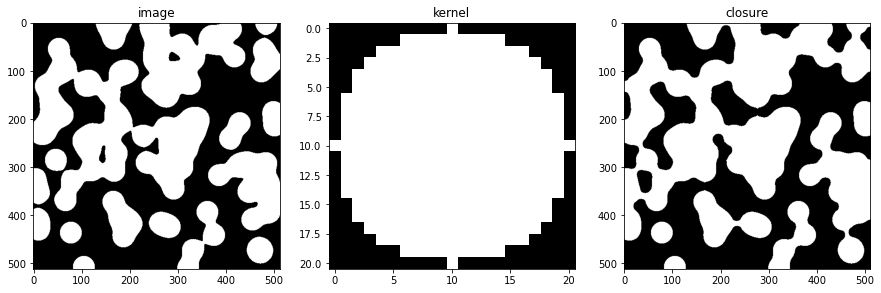

In [31]:
img = data.binary_blobs()
h = morphology.disk(10)

plt.figure(figsize=(15,15))

plt.subplot(131); plt.imshow(img, cmap='gray'); plt.title('image')

plt.subplot(132); plt.imshow(h, cmap='gray'); plt.title('kernel')

plt.subplot(133); plt.imshow(morphology.binary_closing(img, h), cmap='gray'); plt.title('closure')

plt.show()

## Exercice 4
Faire une ouverture sur différent niveau de gris pour retirer la majorité des petites étoiles

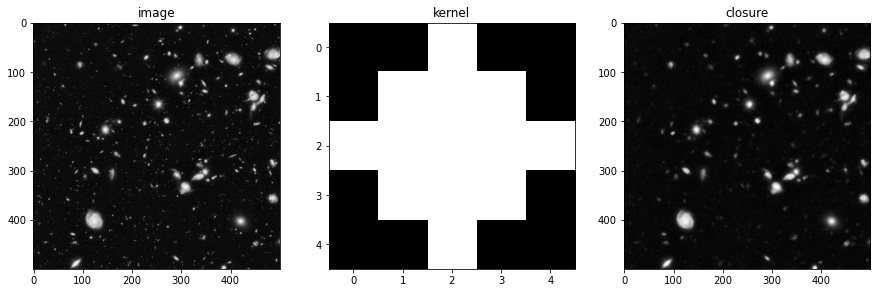

In [44]:
img = data.hubble_deep_field().mean(axis=2)[:500, :500]
h = morphology.disk(2)

plt.figure(figsize=(15,15))

plt.subplot(131); plt.imshow(img, cmap='gray'); plt.title('image')

plt.subplot(132); plt.imshow(h, cmap='gray'); plt.title('kernel')

plt.subplot(133); plt.imshow(morphology.opening(img, h), cmap='gray'); plt.title('closure')

plt.show()

## Exercice 5
Appliquer un filtre Top-Hat afin de récupérer les étoiles retirer de l'image suite à l'ouverture.
> https://scikit-image.org/docs/dev/auto_examples/filters/plot_tophat.html

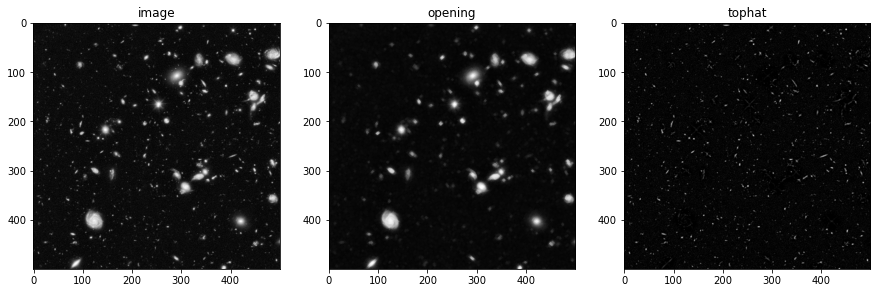

In [43]:
img = data.hubble_deep_field().mean(axis=2)[:500, :500]

plt.figure(figsize=(15,15))

plt.subplot(131); plt.imshow(img, cmap='gray'); plt.title('image')

h =  morphology.disk(2)

op = morphology.opening(img, h)
plt.subplot(132); plt.imshow(op, cmap='gray'); plt.title('opening')

tophat = img - op
plt.subplot(133); plt.imshow(tophat, cmap='gray'); plt.title('tophat')

plt.show()